# Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

# Business Goal :

- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Determine the optimal value of lambda for ridge and lasso regression.
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- The model will be a good way for the management to understand the pricing dynamics of a new market.

In [89]:
# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

### Inspecting the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# Chekcing the percentage of Null values in all the columns
print('Percentage of Missing Values in all the columns')
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False))

Percentage of Missing Values in all the columns
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64


In [14]:
#Drop columns with maximum missing values
df = df.drop(columns=['PoolQC','Fence', 'MiscFeature', 'Id'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [16]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [17]:
#check unique values of FireplaceQu 
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [18]:
print('Percentage of Missing Values in all the columns')
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False))

Percentage of Missing Values in all the columns
Alley          93.77
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageType      5.55
               ...  
TotalBsmtSF     0.00
MSZoning        0.00
HeatingQC       0.00
CentralAir      0.00
SalePrice       0.00
Length: 77, dtype: float64


In [19]:
#Drop Alley column because more than 90% values are missing or No Alley
df=df.drop(columns=['Alley'])

In [20]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
df.FireplaceQu = df.FireplaceQu.fillna('NA')

In [21]:
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False))

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
                ...  
TotalBsmtSF      0.00
Heating          0.00
MSZoning         0.00
CentralAir       0.00
SalePrice        0.00
Length: 76, dtype: float64


In [22]:
#check unique values of LotFrontage
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [23]:
#check median of LotFrontage
df_median = df.LotFrontage.median()
df_median

#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
df.LotFrontage = df.LotFrontage.fillna(df_median)

In [24]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.median())   

In [25]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
df.MasVnrType = df.MasVnrType.fillna('None')

In [26]:
#replace Nan values of BsmtQual with NA i.e. No Basement
df.BsmtQual = df.BsmtQual.fillna('NA')

In [27]:
#replace Nan values of BsmtCond with NA i.e. No Basement
df.BsmtCond = df.BsmtCond.fillna('NA')

In [28]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
df.BsmtExposure = df.BsmtExposure.fillna('No')

In [29]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
df.BsmtFinType1 = df.BsmtFinType1.fillna('NA')

In [30]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
df.BsmtFinType2 = df.BsmtFinType2.fillna('NA')

In [31]:
#impute missing values of Electrical with mode due to categorical column
df.Electrical = df.Electrical.fillna(df.Electrical.mode()[0])   

In [32]:
#replace Nan values of GarageType with NA i.e. No Garage
df.GarageType = df.GarageType.fillna('NA')

In [33]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

In [34]:
#replace Nan values of GarageFinish with NA i.e. No Garage
df.GarageFinish = df.GarageFinish.fillna('NA')

In [35]:
#replace Nan values of GarageQual with NA i.e. No Garage
df.GarageQual = df.GarageQual.fillna('NA')

In [36]:
#replace Nan values of GarageFinish with NA i.e. No Garage
df.GarageQual = df.GarageQual.fillna('NA')

In [37]:
#replace Nan values of GarageCond with NA i.e. No Garage
df.GarageCond = df.GarageCond.fillna('NA')

In [38]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
df['HouseAge'] = df.YrSold - df.YearBuilt

In [39]:
df['HouseAge']

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: HouseAge, Length: 1460, dtype: int64

In [40]:

#Drop YrSold, YearBuilt after HouseAge
df=df.drop(columns=['YrSold', 'YearBuilt'])

In [41]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
df = df.astype(convert_dict)

In [42]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [43]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [44]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
df = df.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [45]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
df = df.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [46]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [47]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [48]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [50]:
for c in df.columns:
    if df[c].dtype == np.object :
        print(c)
        print(df[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [52]:
#Drop columns which have moe than 80% bias data
df=df.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [54]:
#Get all object type columns
object_columns = []
for c in df.columns:
    if df[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


# Create Dummy Varibales

In [55]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(df['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main df
df = pd.concat([df,MSSubClass_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [56]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(df['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [57]:
#concat MSZoning_df with main df
df = pd.concat([df,MSZoning_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(df['LotShape'],drop_first=True, prefix='LotShape')

In [59]:
#concat LotShape_df with main df
df = pd.concat([df,LotShape_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [60]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(df['LotConfig'],drop_first=True, prefix='LotConfig')

In [62]:
#concat LotConfig_df with main  df
df = pd.concat([df,LotConfig_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [63]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(df['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main  df
df = pd.concat([df,Neighborhood_df],axis=1)
df.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [64]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(df['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main  df
df = pd.concat([df,HouseStyle_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(df['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main  df
df = pd.concat([df,RoofStyle_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [66]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(df['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main df
df = pd.concat([df,Exterior1st_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [67]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(df['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main  df
df = pd.concat([df,Exterior2nd_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [68]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(df['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main  df
df = pd.concat([df,MasVnrType_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.

In [69]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(df['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main df
df = pd.concat([df,Foundation_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8

In [70]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(df['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main df
df = pd.concat([df,GarageType_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [71]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(df['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main  df
df = pd.concat([df,GarageFinish_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [72]:
df.shape

(1460, 162)

In [73]:
#Drop categorical variables after ceating dummy varaibles
df=df.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

# Prepairing Data For Modeling

In [74]:
df_train,df_test = train_test_split(df,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [75]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,102

Rescalling The Numeric Factors

In [78]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.10

In [79]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000

Training The Model

In [80]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [81]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

# RFE- Recursive Feature Elimination

In [82]:
## Take top 35 features
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 35)
rfe = rfe.fit(X_train,y_train)

In [83]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 38),
 ('LotArea', False, 9),
 ('OverallQual', True, 1),
 ('OverallCond', False, 25),
 ('YearRemodAdd', False, 81),
 ('MasVnrArea', False, 94),
 ('ExterQual', False, 67),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 90),
 ('BsmtFinSF1', False, 5),
 ('BsmtFinSF2', False, 16),
 ('BsmtUnfSF', False, 12),
 ('TotalBsmtSF', False, 4),
 ('HeatingQC', False, 105),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 18),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 58),
 ('BsmtHalfBath', False, 97),
 ('FullBath', False, 41),
 ('HalfBath', False, 35),
 ('BedroomAbvGr', False, 63),
 ('KitchenAbvGr', False, 89),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 83),
 ('Fireplaces', False, 74),
 ('FireplaceQu', False, 28),
 ('GarageYrBlt', False, 78),
 ('GarageCars', False, 43),
 ('GarageArea', False, 101),
 ('WoodDeckSF', False, 71),
 ('OpenPorchSF', False, 107),
 ('EnclosedPorch', False, 111),
 ('3SsnPorch', False,

In [86]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'MSSubClass_30', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'GarageType_Attchd', 'GarageFinish_NA'], dtype='object')

In [85]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=113)

# Building model using statsmodel, for the detailed statistics

In [87]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [90]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [91]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [92]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:11:44   Log-Likelihood:                -12043.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     986   BIC:                         2.433e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.581e+05   2774.394     56.993      0.000    1.53e+05    1.64e+05
OverallQual           1.858e+04   1889.601      9.834      0.000    1.49e+04    2.23e+04
BsmtQual              8338.0240   1439.247      5.793      0.000    5513.684    1.12e+04
BsmtExposure          1.248e+04   1198.548     10.416      0.000    1.01e+04    1.48e+04
1stFlrSF              1.155e+04      1e+04      1.152      0.250   -8127.602    3.12e+04
2ndFlrSF               1.88e+04   1.06e+04      1.771      0.077   -2032.609    3.96e+04
GrLivArea              1.32e+04   1.32e+04      1.003      0.316   -1.26e+04     3.9e+04
KitchenQual           1.048e+04   1467.304      7.140      0.000    7597.457    1.34e+04
MSSubClass_30        -8052.3304   5667.272     -1.421      0.156   -1.92e+04    3068.970
MSSubClass_120       -3.002e+04   4819.806     -6.229      0.000   -3.95e+04   -2.06e+04
MSSubClass_160       -3.354e+04   6670.226     -5.028      0.000   -4.66e+04   -2.04e+04
LotShape_IR2          9616.9322   6030.818      1.595      0.111   -2217.781    2.15e+04
LotShape_IR3         -1.984e+04   1.12e+04     -1.773      0.077   -4.18e+04    2121.990
LotConfig_FR3        -1.031e+04   1.91e+04     -0.539      0.590   -4.78e+04    2.72e+04
Neighborhood_BrDale   1.959e+04   1.15e+04      1.702      0.089   -2999.401    4.22e+04
Neighborhood_Crawfor  2.975e+04   6115.830      4.864      0.000    1.77e+04    4.17e+04
Neighborhood_NPkVill  2.374e+04    1.4e+04      1.693      0.091   -3782.437    5.13e+04
Neighborhood_NoRidge  6.308e+04   6397.785      9.860      0.000    5.05e+04    7.56e+04
Neighborhood_NridgHt  5.446e+04   5261.637     10.350      0.000    4.41e+04    6.48e+04
Neighborhood_Somerst  2.851e+04   5117.921      5.571      0.000    1.85e+04    3.86e+04
Neighborhood_StoneBr  4.021e+04   9844.255      4.084      0.000    2.09e+04    5.95e+04
HouseStyle_1.5Unf     1.296e+04   9830.351      1.318      0.188   -6331.063    3.23e+04
HouseStyle_1Story     2.692e+04   3995.572      6.737      0.000    1.91e+04    3.48e+04
HouseStyle_2.5Fin    -2.249e+04   1.89e+04     -1.192      0.234   -5.95e+04    1.45e+04
Exterior1st_AsphShn  -8578.7189   1.67e+04     -0.513      0.608   -4.14e+04    2.42e+04
Exterior1st_BrkComm  -2.078e+04   2.33e+04     -0.891      0.373   -6.65e+04     2.5e+04
Exterior1st_CemntBd  -1.415e+04   2.34e+04     -0.605      0.545      -6e+04    3.17e+04
Exterior1st_ImStucc  -2.451e+04   3.33e+04     -0.735      0.462   -8.99e+04    4.09e+04
Exterior1st_Stone    -3.058e+04   2.58e+04     -1.185      0.236   -8.12e+04    2.01e+04
Exterior2nd_AsphShn  -8578.7189   1.67e+04     -0.513      0.608   -4.14e+04    2.42e+04
Exterior2nd_BrkFace   2.482e+04   8450.948      2.937      0.003    8238.194    4.14e+04
Exterior2nd_CmentBd   1.858e+04   2.34e+04      0.792    

In [93]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
29,Exterior2nd_AsphShn,inf
24,Exterior1st_AsphShn,inf
6,GrLivArea,165.54
5,2ndFlrSF,107.83
4,1stFlrSF,96.21
31,Exterior2nd_CmentBd,18.37
26,Exterior1st_CemntBd,18.27
0,const,7.36
22,HouseStyle_1Story,3.82
1,OverallQual,3.42


In [95]:
X_train_new = X_train_rfe.drop(['Exterior2nd_AsphShn'],axis=1)

In [97]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:18:58   Log-Likelihood:                -12043.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     986   BIC:                         2.433e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.581e+05   2774.394     56.993      0.000    1.53e+05    1.64e+05
OverallQual           1.858e+04   1889.601      9.834      0.000    1.49e+04    2.23e+04
BsmtQual              8338.0240   1439.247      5.793      0.000    5513.684    1.12e+04
BsmtExposure          1.248e+04   1198.548     10.416      0.000    1.01e+04    1.48e+04
1stFlrSF              1.155e+04      1e+04      1.152      0.250   -8127.602    3.12e+04
2ndFlrSF               1.88e+04   1.06e+04      1.771      0.077   -2032.609    3.96e+04
GrLivArea              1.32e+04   1.32e+04      1.003      0.316   -1.26e+04     3.9e+04
KitchenQual           1.048e+04   1467.304      7.140      0.000    7597.457    1.34e+04
MSSubClass_30        -8052.3304   5667.272     -1.421      0.156   -1.92e+04    3068.970
MSSubClass_120       -3.002e+04   4819.806     -6.229      0.000   -3.95e+04   -2.06e+04
MSSubClass_160       -3.354e+04   6670.226     -5.028      0.000   -4.66e+04   -2.04e+04
LotShape_IR2          9616.9322   6030.818      1.595      0.111   -2217.781    2.15e+04
LotShape_IR3         -1.984e+04   1.12e+04     -1.773      0.077   -4.18e+04    2121.990
LotConfig_FR3        -1.031e+04   1.91e+04     -0.539      0.590   -4.78e+04    2.72e+04
Neighborhood_BrDale   1.959e+04   1.15e+04      1.702      0.089   -2999.401    4.22e+04
Neighborhood_Crawfor  2.975e+04   6115.830      4.864      0.000    1.77e+04    4.17e+04
Neighborhood_NPkVill  2.374e+04    1.4e+04      1.693      0.091   -3782.437    5.13e+04
Neighborhood_NoRidge  6.308e+04   6397.785      9.860      0.000    5.05e+04    7.56e+04
Neighborhood_NridgHt  5.446e+04   5261.637     10.350      0.000    4.41e+04    6.48e+04
Neighborhood_Somerst  2.851e+04   5117.921      5.571      0.000    1.85e+04    3.86e+04
Neighborhood_StoneBr  4.021e+04   9844.255      4.084      0.000    2.09e+04    5.95e+04
HouseStyle_1.5Unf     1.296e+04   9830.351      1.318      0.188   -6331.063    3.23e+04
HouseStyle_1Story     2.692e+04   3995.572      6.737      0.000    1.91e+04    3.48e+04
HouseStyle_2.5Fin    -2.249e+04   1.89e+04     -1.192      0.234   -5.95e+04    1.45e+04
Exterior1st_AsphShn  -1.716e+04   3.34e+04     -0.513      0.608   -8.27e+04    4.84e+04
Exterior1st_BrkComm  -2.078e+04   2.33e+04     -0.891      0.373   -6.65e+04     2.5e+04
Exterior1st_CemntBd  -1.415e+04   2.34e+04     -0.605      0.545      -6e+04    3.17e+04
Exterior1st_ImStucc  -2.451e+04   3.33e+04     -0.735      0.462   -8.99e+04    4.09e+04
Exterior1st_Stone    -3.058e+04   2.58e+04     -1.185      0.236   -8.12e+04    2.01e+04
Exterior2nd_BrkFace   2.482e+04   8450.948      2.937      0.003    8238.194    4.14e+04
Exterior2nd_CmentBd   1.858e+04   2.34e+04      0.792      0.428   -2.74e+04    6.46e+04
Exterior2nd_Stone     1.918e+04   2.12e+04      0.906    

In [98]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

In [99]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     151.4
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:22:41   Log-Likelihood:                -12044.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     987   BIC:                         2.432e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.581e+05   2773.330     57.012      0.000    1.53e+05    1.64e+05
OverallQual           1.854e+04   1886.896      9.825      0.000    1.48e+04    2.22e+04
BsmtQual              8440.0971   1424.915      5.923      0.000    5643.887    1.12e+04
BsmtExposure          1.249e+04   1198.075     10.423      0.000    1.01e+04    1.48e+04
1stFlrSF              1.135e+04      1e+04      1.133      0.257   -8305.571     3.1e+04
2ndFlrSF              1.863e+04   1.06e+04      1.757      0.079   -2183.766    3.95e+04
GrLivArea             1.341e+04   1.31e+04      1.021      0.308   -1.24e+04    3.92e+04
KitchenQual           1.047e+04   1466.681      7.138      0.000    7591.055    1.33e+04
MSSubClass_30        -7991.7230   5663.928     -1.411      0.159   -1.91e+04    3123.001
MSSubClass_120       -3.006e+04   4817.573     -6.239      0.000   -3.95e+04   -2.06e+04
MSSubClass_160       -3.359e+04   6666.883     -5.039      0.000   -4.67e+04   -2.05e+04
LotShape_IR2          9587.5200   6028.296      1.590      0.112   -2242.229    2.14e+04
LotShape_IR3         -1.986e+04   1.12e+04     -1.775      0.076   -4.18e+04    2093.535
LotConfig_FR3        -1.026e+04   1.91e+04     -0.537      0.592   -4.78e+04    2.72e+04
Neighborhood_BrDale   1.966e+04   1.15e+04      1.708      0.088   -2923.628    4.22e+04
Neighborhood_Crawfor  2.975e+04   6113.546      4.866      0.000    1.78e+04    4.17e+04
Neighborhood_NPkVill  2.373e+04    1.4e+04      1.693      0.091   -3774.380    5.12e+04
Neighborhood_NoRidge  6.309e+04   6395.366      9.865      0.000    5.05e+04    7.56e+04
Neighborhood_NridgHt  5.446e+04   5259.662     10.355      0.000    4.41e+04    6.48e+04
Neighborhood_Somerst  2.849e+04   5115.846      5.569      0.000    1.84e+04    3.85e+04
Neighborhood_StoneBr  4.024e+04   9840.348      4.090      0.000    2.09e+04    5.96e+04
HouseStyle_1.5Unf     1.306e+04   9824.730      1.329      0.184   -6219.427    3.23e+04
HouseStyle_1Story     2.691e+04   3994.046      6.737      0.000    1.91e+04    3.47e+04
HouseStyle_2.5Fin    -2.256e+04   1.89e+04     -1.196      0.232   -5.96e+04    1.45e+04
Exterior1st_BrkComm  -2.062e+04   2.33e+04     -0.885      0.377   -6.64e+04    2.51e+04
Exterior1st_CemntBd  -1.412e+04   2.34e+04     -0.604      0.546      -6e+04    3.18e+04
Exterior1st_ImStucc  -2.446e+04   3.33e+04     -0.734      0.463   -8.98e+04    4.09e+04
Exterior1st_Stone    -3.054e+04   2.58e+04     -1.184      0.237   -8.12e+04    2.01e+04
Exterior2nd_BrkFace   2.494e+04   8444.642      2.953      0.003    8369.089    4.15e+04
Exterior2nd_CmentBd   1.857e+04   2.34e+04      0.792      0.428   -2.74e+04    6.46e+04
Exterior2nd_Stone     1.942e+04   2.12e+04      0.918      0.359   -2.21e+04     6.1e+04
Exterior2nd_Stucco   -2.177e+04   7767.574     -2.803    

In [100]:
## Lets drop Exterior1st_CemntBd due to high p value
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

In [101]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     156.2
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:26:20   Log-Likelihood:                -12044.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     988   BIC:                         2.432e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.581e+05   2772.311     57.027      0.000    1.53e+05    1.64e+05
OverallQual           1.858e+04   1884.854      9.859      0.000    1.49e+04    2.23e+04
BsmtQual              8437.0248   1424.447      5.923      0.000    5641.735    1.12e+04
BsmtExposure          1.251e+04   1196.857     10.456      0.000    1.02e+04    1.49e+04
1stFlrSF              1.126e+04      1e+04      1.124      0.261   -8390.211    3.09e+04
2ndFlrSF              1.854e+04   1.06e+04      1.749      0.081   -2265.706    3.94e+04
GrLivArea             1.351e+04   1.31e+04      1.029      0.304   -1.23e+04    3.93e+04
KitchenQual            1.05e+04   1465.322      7.166      0.000    7624.515    1.34e+04
MSSubClass_30        -7924.8209   5661.022     -1.400      0.162    -1.9e+04    3184.188
MSSubClass_120       -3.012e+04   4814.997     -6.255      0.000   -3.96e+04   -2.07e+04
MSSubClass_160       -3.356e+04   6664.543     -5.036      0.000   -4.66e+04   -2.05e+04
LotShape_IR2          9572.4321   6026.305      1.588      0.113   -2253.396    2.14e+04
LotShape_IR3         -1.989e+04   1.12e+04     -1.778      0.076   -4.18e+04    2059.757
LotConfig_FR3        -1.021e+04   1.91e+04     -0.534      0.593   -4.77e+04    2.73e+04
Neighborhood_BrDale    1.96e+04   1.15e+04      1.703      0.089   -2978.914    4.22e+04
Neighborhood_Crawfor  2.971e+04   6111.260      4.862      0.000    1.77e+04    4.17e+04
Neighborhood_NPkVill  2.376e+04    1.4e+04      1.696      0.090   -3734.753    5.13e+04
Neighborhood_NoRidge  6.302e+04   6392.330      9.859      0.000    5.05e+04    7.56e+04
Neighborhood_NridgHt  5.434e+04   5253.992     10.343      0.000     4.4e+04    6.46e+04
Neighborhood_Somerst  2.838e+04   5110.759      5.552      0.000    1.83e+04    3.84e+04
Neighborhood_StoneBr  4.008e+04   9833.325      4.076      0.000    2.08e+04    5.94e+04
HouseStyle_1.5Unf     1.309e+04   9821.481      1.332      0.183   -6187.741    3.24e+04
HouseStyle_1Story     2.691e+04   3992.758      6.740      0.000    1.91e+04    3.47e+04
HouseStyle_2.5Fin    -2.263e+04   1.89e+04     -1.200      0.230   -5.96e+04    1.44e+04
Exterior1st_BrkComm  -2.051e+04   2.33e+04     -0.880      0.379   -6.62e+04    2.52e+04
Exterior1st_ImStucc  -2.445e+04   3.33e+04     -0.734      0.463   -8.98e+04    4.09e+04
Exterior1st_Stone    -3.063e+04   2.58e+04     -1.187      0.235   -8.12e+04       2e+04
Exterior2nd_BrkFace   2.494e+04   8441.926      2.954      0.003    8373.426    4.15e+04
Exterior2nd_CmentBd   4846.7698   5708.703      0.849      0.396   -6355.805     1.6e+04
Exterior2nd_Stone     1.953e+04   2.12e+04      0.923      0.356    -2.2e+04     6.1e+04
Exterior2nd_Stucco   -2.174e+04   7764.877     -2.800      0.005    -3.7e+04   -6503.147
GarageType_Attchd     7653.5406   2569.835      2.978    

In [103]:
## let's drop LotConfig_FR3

X_train_new = X_train_new.drop(['LotConfig_FR3'],axis=1)

In [104]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:31:05   Log-Likelihood:                -12044.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     989   BIC:                         2.431e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.581e+05   2771.100     57.046      0.000    1.53e+05    1.64e+05
OverallQual           1.856e+04   1883.867      9.854      0.000    1.49e+04    2.23e+04
BsmtQual              8477.6189   1421.905      5.962      0.000    5687.321    1.13e+04
BsmtExposure          1.249e+04   1195.535     10.447      0.000    1.01e+04    1.48e+04
1stFlrSF              1.125e+04      1e+04      1.124      0.261   -8395.845    3.09e+04
2ndFlrSF               1.85e+04   1.06e+04      1.745      0.081   -2298.980    3.93e+04
GrLivArea             1.356e+04   1.31e+04      1.032      0.302   -1.22e+04    3.93e+04
KitchenQual           1.051e+04   1464.599      7.178      0.000    7638.663    1.34e+04
MSSubClass_30        -7903.6089   5658.838     -1.397      0.163    -1.9e+04    3201.099
MSSubClass_120       -3.029e+04   4802.280     -6.308      0.000   -3.97e+04   -2.09e+04
MSSubClass_160        -3.38e+04   6646.925     -5.085      0.000   -4.68e+04   -2.08e+04
LotShape_IR2          9600.6473   6023.896      1.594      0.111   -2220.439    2.14e+04
LotShape_IR3         -1.991e+04   1.12e+04     -1.781      0.075   -4.18e+04    2028.107
Neighborhood_BrDale   1.988e+04   1.15e+04      1.731      0.084   -2656.800    4.24e+04
Neighborhood_Crawfor  2.972e+04   6109.009      4.866      0.000    1.77e+04    4.17e+04
Neighborhood_NPkVill  2.396e+04    1.4e+04      1.711      0.087   -3520.603    5.14e+04
Neighborhood_NoRidge  6.299e+04   6389.760      9.858      0.000    5.05e+04    7.55e+04
Neighborhood_NridgHt  5.417e+04   5243.039     10.333      0.000    4.39e+04    6.45e+04
Neighborhood_Somerst  2.825e+04   5103.905      5.536      0.000    1.82e+04    3.83e+04
Neighborhood_StoneBr  4.016e+04   9828.536      4.086      0.000    2.09e+04    5.94e+04
HouseStyle_1.5Unf     1.311e+04   9817.833      1.335      0.182   -6156.933    3.24e+04
HouseStyle_1Story     2.691e+04   3991.312      6.742      0.000    1.91e+04    3.47e+04
HouseStyle_2.5Fin    -2.269e+04   1.88e+04     -1.204      0.229   -5.97e+04    1.43e+04
Exterior1st_BrkComm  -2.043e+04   2.33e+04     -0.877      0.381   -6.61e+04    2.53e+04
Exterior1st_ImStucc  -2.448e+04   3.33e+04     -0.735      0.462   -8.98e+04    4.08e+04
Exterior1st_Stone    -3.076e+04   2.58e+04     -1.193      0.233   -8.14e+04    1.98e+04
Exterior2nd_BrkFace   2.496e+04   8438.792      2.958      0.003    8399.674    4.15e+04
Exterior2nd_CmentBd   4892.1986   5706.007      0.857      0.391   -6305.072    1.61e+04
Exterior2nd_Stone     1.964e+04   2.11e+04      0.929      0.353   -2.19e+04    6.11e+04
Exterior2nd_Stucco   -2.172e+04   7762.012     -2.799      0.005    -3.7e+04   -6492.538
GarageType_Attchd     7682.6498   2568.329      2.991      0.003    2642.650    1.27e+04
GarageFinish_NA      -8267.2547   4876.451     -1.695    

In [105]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,GrLivArea,165.34
5,2ndFlrSF,107.70
4,1stFlrSF,96.04
0,const,7.36
21,HouseStyle_1Story,3.82
1,OverallQual,3.40
7,KitchenQual,2.06
2,BsmtQual,1.94
10,MSSubClass_160,1.82
30,GarageType_Attchd,1.53


In [106]:
X_train_new = X_train_new.drop(['2ndFlrSF','GrLivArea','1stFlrSF'],axis=1)

In [107]:
X_train_lm = sm.add_constant(X_train_new)

In [108]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [109]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     117.7
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          3.79e-292
Time:                        19:35:28   Log-Likelihood:                -12216.
No. Observations:                1021   AIC:                         2.449e+04
Df Residuals:                     992   BIC:                         2.463e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.706e+05   2576.223     66.238      0.000    1.66e+05    1.76e+05
OverallQual           3.348e+04   2042.246     16.396      0.000    2.95e+04    3.75e+04
BsmtQual              6585.1098   1674.912      3.932      0.000    3298.332    9871.888
BsmtExposure          1.047e+04   1322.735      7.918      0.000    7877.616    1.31e+04
KitchenQual            1.43e+04   1716.565      8.331      0.000    1.09e+04    1.77e+04
MSSubClass_30         -1.81e+04   6610.891     -2.737      0.006   -3.11e+04   -5123.275
MSSubClass_120       -4.504e+04   5596.992     -8.047      0.000    -5.6e+04   -3.41e+04
MSSubClass_160        -4.81e+04   7794.447     -6.171      0.000   -6.34e+04   -3.28e+04
LotShape_IR2          1.338e+04   7105.822      1.883      0.060    -565.063    2.73e+04
LotShape_IR3          7409.4458   1.31e+04      0.565      0.572   -1.83e+04    3.31e+04
Neighborhood_BrDale   4651.3975   1.35e+04      0.343      0.731   -2.19e+04    3.12e+04
Neighborhood_Crawfor    3.7e+04   7207.615      5.133      0.000    2.29e+04    5.11e+04
Neighborhood_NPkVill  2.478e+04   1.66e+04      1.497      0.135   -7699.968    5.73e+04
Neighborhood_NoRidge  9.772e+04   7257.083     13.465      0.000    8.35e+04    1.12e+05
Neighborhood_NridgHt  5.685e+04   6176.080      9.205      0.000    4.47e+04     6.9e+04
Neighborhood_Somerst  2.096e+04   6015.188      3.484      0.001    9151.663    3.28e+04
Neighborhood_StoneBr  4.389e+04   1.16e+04      3.778      0.000    2.11e+04    6.67e+04
HouseStyle_1.5Unf     -3.33e+04    1.1e+04     -3.039      0.002   -5.48e+04   -1.18e+04
HouseStyle_1Story     1267.7870   2834.571      0.447      0.655   -4294.656    6830.230
HouseStyle_2.5Fin     4.435e+04   1.96e+04      2.266      0.024    5948.998    8.28e+04
Exterior1st_BrkComm  -1.155e+04   2.75e+04     -0.419      0.675   -6.56e+04    4.25e+04
Exterior1st_ImStucc  -6.888e+04   3.92e+04     -1.755      0.080   -1.46e+05    8129.762
Exterior1st_Stone     7640.7346   3.02e+04      0.253      0.800   -5.17e+04    6.69e+04
Exterior2nd_BrkFace   2.951e+04   9926.700      2.973      0.003       1e+04     4.9e+04
Exterior2nd_CmentBd   9347.9082   6705.626      1.394      0.164   -3810.933    2.25e+04
Exterior2nd_Stone      1.21e+04    2.5e+04      0.484      0.628   -3.69e+04    6.11e+04
Exterior2nd_Stucco    -547.6964   9078.131     -0.060      0.952   -1.84e+04    1.73e+04
GarageType_Attchd     8027.6782   3012.375      2.665      0.008    2116.319    1.39e+04
GarageFinish_NA      -5847.8807   5680.011     -1.030      0.303    -1.7e+04    5298.335
==============================================================================
Omnibus:                      448.073   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6538.45

In [110]:
X_train_new = X_train_new.drop(['Exterior2nd_Stucco'],axis=1)

In [111]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          3.40e-293
Time:                        19:40:39   Log-Likelihood:                -12216.
No. Observations:                1021   AIC:                         2.449e+04
Df Residuals:                     993   BIC:                         2.463e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.706e+05   2542.132     67.117      0.000    1.66e+05    1.76e+05
OverallQual           3.348e+04   2036.329     16.439      0.000    2.95e+04    3.75e+04
BsmtQual              6592.3810   1669.732      3.948      0.000    3315.772    9868.990
BsmtExposure          1.048e+04   1321.123      7.930      0.000    7883.804    1.31e+04
KitchenQual            1.43e+04   1715.188      8.336      0.000    1.09e+04    1.77e+04
MSSubClass_30        -1.815e+04   6536.442     -2.777      0.006    -3.1e+04   -5327.752
MSSubClass_120       -4.504e+04   5593.925     -8.052      0.000    -5.6e+04   -3.41e+04
MSSubClass_160       -4.809e+04   7785.868     -6.176      0.000   -6.34e+04   -3.28e+04
LotShape_IR2          1.337e+04   7099.379      1.883      0.060    -564.604    2.73e+04
LotShape_IR3          7360.8566   1.31e+04      0.563      0.574   -1.83e+04     3.3e+04
Neighborhood_BrDale   4659.3173   1.35e+04      0.344      0.731   -2.19e+04    3.12e+04
Neighborhood_Crawfor  3.694e+04   7142.502      5.172      0.000    2.29e+04     5.1e+04
Neighborhood_NPkVill  2.478e+04   1.65e+04      1.498      0.135   -7686.268    5.72e+04
Neighborhood_NoRidge  9.773e+04   7249.358     13.482      0.000    8.35e+04    1.12e+05
Neighborhood_NridgHt  5.686e+04   6170.016      9.216      0.000    4.48e+04     6.9e+04
Neighborhood_Somerst  2.096e+04   6010.269      3.488      0.001    9170.455    3.28e+04
Neighborhood_StoneBr   4.39e+04   1.16e+04      3.782      0.000    2.11e+04    6.67e+04
HouseStyle_1.5Unf    -3.327e+04   1.09e+04     -3.041      0.002   -5.47e+04   -1.18e+04
HouseStyle_1Story     1275.5126   2830.256      0.451      0.652   -4278.456    6829.482
HouseStyle_2.5Fin     4.438e+04   1.96e+04      2.270      0.023    6007.341    8.28e+04
Exterior1st_BrkComm  -1.154e+04   2.75e+04     -0.419      0.675   -6.55e+04    4.25e+04
Exterior1st_ImStucc  -6.888e+04   3.92e+04     -1.756      0.079   -1.46e+05    8085.601
Exterior1st_Stone     7657.6084   3.02e+04      0.254      0.800   -5.16e+04    6.69e+04
Exterior2nd_BrkFace   2.953e+04   9919.161      2.977      0.003    1.01e+04     4.9e+04
Exterior2nd_CmentBd   9351.6445   6701.975      1.395      0.163   -3800.016    2.25e+04
Exterior2nd_Stone     1.214e+04    2.5e+04      0.486      0.627   -3.68e+04    6.11e+04
GarageType_Attchd     8046.5043   2994.666      2.687      0.007    2169.904    1.39e+04
GarageFinish_NA      -5836.3406   5673.940     -1.029      0.304    -1.7e+04    5297.949
==============================================================================
Omnibus:                      447.931   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6543.099
Skew:                           1.615   Prob(JB):                         0.00
Kurtosis

In [112]:
## drop Exterior1st_Stone
X_train_new = X_train_new.drop(['Exterior1st_Stone'],axis=1)

In [113]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     127.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          3.08e-294
Time:                        19:41:52   Log-Likelihood:                -12216.
No. Observations:                1021   AIC:                         2.449e+04
Df Residuals:                     994   BIC:                         2.462e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.706e+05   2540.513     67.155      0.000    1.66e+05    1.76e+05
OverallQual           3.349e+04   2034.910     16.456      0.000    2.95e+04    3.75e+04
BsmtQual              6608.2039   1667.780      3.962      0.000    3335.430    9880.978
BsmtExposure          1.048e+04   1320.501      7.934      0.000    7884.987    1.31e+04
KitchenQual           1.432e+04   1712.924      8.357      0.000     1.1e+04    1.77e+04
MSSubClass_30        -1.813e+04   6532.899     -2.776      0.006    -3.1e+04   -5314.931
MSSubClass_120       -4.509e+04   5588.243     -8.069      0.000   -5.61e+04   -3.41e+04
MSSubClass_160       -4.806e+04   7781.376     -6.176      0.000   -6.33e+04   -3.28e+04
LotShape_IR2          1.335e+04   7095.856      1.882      0.060    -570.521    2.73e+04
LotShape_IR3          7332.1871   1.31e+04      0.561      0.575   -1.83e+04     3.3e+04
Neighborhood_BrDale   4665.7218   1.35e+04      0.345      0.730   -2.19e+04    3.12e+04
Neighborhood_Crawfor   3.71e+04   7112.560      5.215      0.000    2.31e+04    5.11e+04
Neighborhood_NPkVill  2.478e+04   1.65e+04      1.498      0.134   -7673.806    5.72e+04
Neighborhood_NoRidge  9.768e+04   7242.923     13.486      0.000    8.35e+04    1.12e+05
Neighborhood_NridgHt   5.68e+04   6161.214      9.218      0.000    4.47e+04    6.89e+04
Neighborhood_Somerst  2.091e+04   6004.231      3.483      0.001    9132.516    3.27e+04
Neighborhood_StoneBr  4.387e+04   1.16e+04      3.780      0.000    2.11e+04    6.66e+04
HouseStyle_1.5Unf    -3.326e+04   1.09e+04     -3.042      0.002   -5.47e+04   -1.18e+04
HouseStyle_1Story     1297.2359   2827.627      0.459      0.646   -4251.568    6846.039
HouseStyle_2.5Fin     4.436e+04   1.95e+04      2.270      0.023    6009.043    8.27e+04
Exterior1st_BrkComm  -1.148e+04   2.75e+04     -0.417      0.676   -6.55e+04    4.25e+04
Exterior1st_ImStucc   -6.89e+04   3.92e+04     -1.757      0.079   -1.46e+05    8031.309
Exterior2nd_BrkFace   2.951e+04   9914.300      2.977      0.003    1.01e+04     4.9e+04
Exterior2nd_CmentBd   9313.3424   6697.119      1.391      0.165   -3828.771    2.25e+04
Exterior2nd_Stone     1.467e+04   2.29e+04      0.642      0.521   -3.02e+04    5.95e+04
GarageType_Attchd     8069.9945   2991.824      2.697      0.007    2198.979    1.39e+04
GarageFinish_NA      -5799.2991   5669.389     -1.023      0.307   -1.69e+04    5326.046
==============================================================================
Omnibus:                      447.507   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6531.609
Skew:                           1.613   Prob(JB):                         0.00
Kurtosis:                      14.964   Cond. No.                         51.0
==================

In [114]:
## Drop Exterior1st_BrkComm
X_train_new = X_train_new.drop(['Exterior1st_BrkComm'],axis=1)


In [115]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     132.1
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          2.89e-295
Time:                        19:43:23   Log-Likelihood:                -12217.
No. Observations:                1021   AIC:                         2.449e+04
Df Residuals:                     995   BIC:                         2.461e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.706e+05   2539.403     67.187      0.000    1.66e+05    1.76e+05
OverallQual           3.349e+04   2034.018     16.466      0.000    2.95e+04    3.75e+04
BsmtQual              6659.6522   1662.530      4.006      0.000    3397.185    9922.119
BsmtExposure          1.047e+04   1319.943      7.935      0.000    7883.909    1.31e+04
KitchenQual           1.434e+04   1711.325      8.379      0.000     1.1e+04    1.77e+04
MSSubClass_30        -1.804e+04   6526.628     -2.765      0.006   -3.09e+04   -5237.213
MSSubClass_120       -4.508e+04   5585.888     -8.070      0.000    -5.6e+04   -3.41e+04
MSSubClass_160       -4.807e+04   7778.096     -6.180      0.000   -6.33e+04   -3.28e+04
LotShape_IR2          1.335e+04   7092.901      1.882      0.060    -569.642    2.73e+04
LotShape_IR3          7309.4923   1.31e+04      0.560      0.576   -1.83e+04    3.29e+04
Neighborhood_BrDale   4710.4069   1.35e+04      0.348      0.728   -2.18e+04    3.13e+04
Neighborhood_Crawfor   3.71e+04   7109.603      5.218      0.000    2.31e+04    5.11e+04
Neighborhood_NPkVill   2.48e+04   1.65e+04      1.501      0.134   -7634.542    5.72e+04
Neighborhood_NoRidge  9.762e+04   7238.354     13.486      0.000    8.34e+04    1.12e+05
Neighborhood_NridgHt  5.672e+04   6156.284      9.214      0.000    4.46e+04    6.88e+04
Neighborhood_Somerst  2.088e+04   6001.038      3.479      0.001    9100.504    3.27e+04
Neighborhood_StoneBr  4.382e+04   1.16e+04      3.778      0.000    2.11e+04    6.66e+04
HouseStyle_1.5Unf    -3.324e+04   1.09e+04     -3.042      0.002   -5.47e+04   -1.18e+04
HouseStyle_1Story     1243.3491   2823.507      0.440      0.660   -4297.362    6784.060
HouseStyle_2.5Fin     4.436e+04   1.95e+04      2.271      0.023    6023.746    8.27e+04
Exterior1st_ImStucc  -6.884e+04   3.92e+04     -1.757      0.079   -1.46e+05    8056.776
Exterior2nd_BrkFace   2.957e+04   9909.363      2.984      0.003    1.01e+04     4.9e+04
Exterior2nd_CmentBd   9296.2852   6694.214      1.389      0.165   -3840.113    2.24e+04
Exterior2nd_Stone     1.486e+04   2.28e+04      0.651      0.515      -3e+04    5.97e+04
GarageType_Attchd     8065.5489   2990.563      2.697      0.007    2197.014    1.39e+04
GarageFinish_NA      -5737.6240   5665.111     -1.013      0.311   -1.69e+04    5379.313
==============================================================================
Omnibus:                      446.188   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6512.989
Skew:                           1.606   Prob(JB):                         0.00
Kurtosis:                      14.949   Cond. No.                         51.0
==============================================================================

Notes:
[1] Standard Errors 

In [116]:
## Drop Neighborhood_BrDale, LotShape_IR3

X_train_new = X_train_new.drop(['Neighborhood_BrDale','LotShape_IR3'],axis=1)

In [117]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          2.49e-297
Time:                        19:45:13   Log-Likelihood:                -12217.
No. Observations:                1021   AIC:                         2.448e+04
Df Residuals:                     997   BIC:                         2.460e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.708e+05   2526.303     67.595      0.000    1.66e+05    1.76e+05
OverallQual           3.362e+04   2020.687     16.637      0.000    2.97e+04    3.76e+04
BsmtQual              6675.2168   1656.057      4.031      0.000    3425.460    9924.974
BsmtExposure          1.051e+04   1317.275      7.979      0.000    7926.040    1.31e+04
KitchenQual           1.428e+04   1706.281      8.367      0.000    1.09e+04    1.76e+04
MSSubClass_30        -1.793e+04   6516.575     -2.751      0.006   -3.07e+04   -5140.612
MSSubClass_120        -4.51e+04   5572.917     -8.092      0.000    -5.6e+04   -3.42e+04
MSSubClass_160       -4.665e+04   6567.867     -7.103      0.000   -5.95e+04   -3.38e+04
LotShape_IR2          1.324e+04   7084.813      1.869      0.062    -662.299    2.71e+04
Neighborhood_Crawfor  3.694e+04   7099.495      5.203      0.000     2.3e+04    5.09e+04
Neighborhood_NPkVill  2.399e+04   1.64e+04      1.467      0.143   -8108.326    5.61e+04
Neighborhood_NoRidge  9.738e+04   7223.621     13.481      0.000    8.32e+04    1.12e+05
Neighborhood_NridgHt  5.639e+04   6127.450      9.202      0.000    4.44e+04    6.84e+04
Neighborhood_Somerst  2.026e+04   5824.969      3.477      0.001    8824.551    3.17e+04
Neighborhood_StoneBr  4.342e+04   1.16e+04      3.756      0.000    2.07e+04    6.61e+04
HouseStyle_1.5Unf    -3.331e+04   1.09e+04     -3.050      0.002   -5.47e+04   -1.19e+04
HouseStyle_1Story     1295.4899   2819.872      0.459      0.646   -4238.076    6829.056
HouseStyle_2.5Fin     4.427e+04   1.95e+04      2.268      0.024    5964.243    8.26e+04
Exterior1st_ImStucc  -6.884e+04   3.92e+04     -1.758      0.079   -1.46e+05    7994.969
Exterior2nd_BrkFace   2.993e+04   9872.494      3.031      0.002    1.06e+04    4.93e+04
Exterior2nd_CmentBd   9408.9430   6672.492      1.410      0.159   -3684.797    2.25e+04
Exterior2nd_Stone     1.498e+04   2.28e+04      0.656      0.512   -2.98e+04    5.98e+04
GarageType_Attchd     7988.4911   2985.632      2.676      0.008    2129.647    1.38e+04
GarageFinish_NA      -5817.1494   5658.520     -1.028      0.304   -1.69e+04    5286.826
==============================================================================
Omnibus:                      447.667   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6433.426
Skew:                           1.619   Prob(JB):                         0.00
Kurtosis:                      14.864   Cond. No.                         51.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
## drop HouseStyle_1Story

X_train_new = X_train_new.drop(['HouseStyle_1Story'],axis=1)

In [119]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     150.5
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          2.23e-298
Time:                        19:47:48   Log-Likelihood:                -12217.
No. Observations:                1021   AIC:                         2.448e+04
Df Residuals:                     998   BIC:                         2.459e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.711e+05   2399.538     71.317      0.000    1.66e+05    1.76e+05
OverallQual           3.346e+04   1988.675     16.824      0.000    2.96e+04    3.74e+04
BsmtQual              6670.1788   1655.366      4.029      0.000    3421.782    9918.576
BsmtExposure          1.052e+04   1316.689      7.987      0.000    7933.193    1.31e+04
KitchenQual           1.432e+04   1703.153      8.407      0.000     1.1e+04    1.77e+04
MSSubClass_30        -1.727e+04   6353.211     -2.718      0.007   -2.97e+04   -4800.138
MSSubClass_120        -4.46e+04   5462.943     -8.163      0.000   -5.53e+04   -3.39e+04
MSSubClass_160       -4.716e+04   6470.615     -7.288      0.000   -5.99e+04   -3.45e+04
LotShape_IR2          1.313e+04   7078.063      1.855      0.064    -757.724     2.7e+04
Neighborhood_Crawfor  3.684e+04   7093.803      5.194      0.000    2.29e+04    5.08e+04
Neighborhood_NPkVill  2.399e+04   1.64e+04      1.467      0.143   -8093.747    5.61e+04
Neighborhood_NoRidge  9.707e+04   7188.808     13.503      0.000     8.3e+04    1.11e+05
Neighborhood_NridgHt  5.672e+04   6081.797      9.326      0.000    4.48e+04    6.87e+04
Neighborhood_Somerst  2.047e+04   5804.299      3.526      0.000    9077.512    3.19e+04
Neighborhood_StoneBr  4.369e+04   1.15e+04      3.786      0.000     2.1e+04    6.63e+04
HouseStyle_1.5Unf    -3.383e+04   1.09e+04     -3.116      0.002   -5.51e+04   -1.25e+04
HouseStyle_2.5Fin     4.383e+04   1.95e+04      2.249      0.025    5581.443    8.21e+04
Exterior1st_ImStucc  -6.776e+04   3.91e+04     -1.734      0.083   -1.44e+05    8903.644
Exterior2nd_BrkFace   3.038e+04   9819.566      3.094      0.002    1.11e+04    4.96e+04
Exterior2nd_CmentBd   9394.0166   6669.775      1.408      0.159   -3694.375    2.25e+04
Exterior2nd_Stone      1.56e+04   2.28e+04      0.685      0.494   -2.91e+04    6.03e+04
GarageType_Attchd     8354.5001   2876.238      2.905      0.004    2710.331     1.4e+04
GarageFinish_NA      -5754.1106   5654.620     -1.018      0.309   -1.69e+04    5342.197
==============================================================================
Omnibus:                      446.623   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6419.037
Skew:                           1.614   Prob(JB):                         0.00
Kurtosis:                      14.852   Cond. No.                         50.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
X_train_new = X_train_new.drop(['const'],axis=1)

In [121]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,OverallQual,2.65
3,KitchenQual,1.99
1,BsmtQual,1.86
11,Neighborhood_NridgHt,1.38
20,GarageType_Attchd,1.37
5,MSSubClass_120,1.33
12,Neighborhood_Somerst,1.33
6,MSSubClass_160,1.23
2,BsmtExposure,1.19
10,Neighborhood_NoRidge,1.19


# Residual analysis of Train Data

In [122]:
y_train_cnst = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

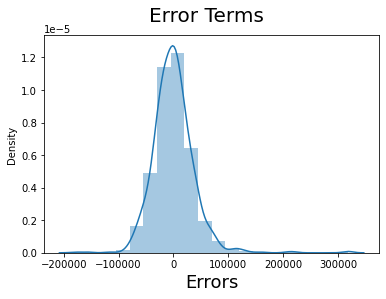

In [123]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Evaluate R2 of Train model

In [124]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.77

In [125]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1478148907620.088
1447746236.6504288
38049.260658394254


In [126]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

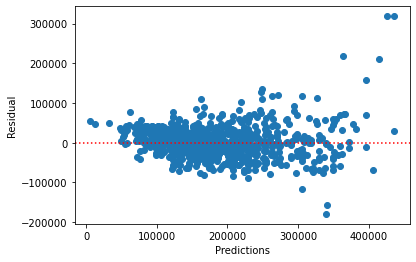

In [127]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

# Prediction and Evalution on Test Data

In [128]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.278464,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,

In [129]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008

In [130]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [131]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'MSSubClass_30', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR2', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone', 'GarageType_Attchd', 'GarageFinish_NA'], dtype='object')

In [132]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [133]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [134]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     78.67
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          1.31e-130
Time:                        20:00:01   Log-Likelihood:                -5228.8
No. Observations:                 439   AIC:                         1.050e+04
Df Residuals:                     417   BIC:                         1.059e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.769e+05   3584.525     49.350      0.000     1.7e+05    1.84e+05
OverallQual           3.633e+04   3114.388     11.665      0.000    3.02e+04    4.25e+04
BsmtQual              1.096e+04   2686.833      4.079      0.000    5678.825    1.62e+04
BsmtExposure          7092.3694   2046.112      3.466      0.001    3070.390    1.11e+04
KitchenQual           9679.3560   2496.067      3.878      0.000    4772.913    1.46e+04
MSSubClass_30        -1.493e+04   8248.129     -1.810      0.071   -3.11e+04    1283.587
MSSubClass_120       -5.252e+04   8671.065     -6.057      0.000   -6.96e+04   -3.55e+04
MSSubClass_160       -4.409e+04   1.02e+04     -4.341      0.000   -6.41e+04   -2.41e+04
LotShape_IR2          6.258e+04   1.22e+04      5.125      0.000    3.86e+04    8.66e+04
Neighborhood_Crawfor    3.7e+04   9538.818      3.879      0.000    1.82e+04    5.57e+04
Neighborhood_NPkVill  2.547e+04   2.27e+04      1.121      0.263   -1.92e+04    7.01e+04
Neighborhood_NoRidge  7.016e+04   1.56e+04      4.505      0.000    3.95e+04    1.01e+05
Neighborhood_NridgHt  8.525e+04   1.02e+04      8.381      0.000    6.53e+04    1.05e+05
Neighborhood_Somerst  5621.7021   8248.464      0.682      0.496   -1.06e+04    2.18e+04
Neighborhood_StoneBr  1.005e+05   1.19e+04      8.460      0.000    7.71e+04    1.24e+05
HouseStyle_1.5Unf    -1.752e+04   3.71e+04     -0.472      0.637   -9.05e+04    5.55e+04
HouseStyle_2.5Fin     3.376e+04   1.93e+04      1.745      0.082   -4273.242    7.18e+04
Exterior1st_ImStucc   1.394e-11   1.24e-11      1.127      0.261   -1.04e-11    3.83e-11
Exterior2nd_BrkFace   2335.9413   1.27e+04      0.184      0.854   -2.27e+04    2.73e+04
Exterior2nd_CmentBd   1.265e+04   8593.854      1.472      0.142   -4243.711    2.95e+04
Exterior2nd_Stone    -4095.9808   2.78e+04     -0.147      0.883   -5.87e+04    5.05e+04
GarageType_Attchd    -1159.2939   4272.074     -0.271      0.786   -9556.778    7238.190
GarageFinish_NA      -2.273e+04   8762.025     -2.594      0.010   -3.99e+04   -5501.926
==============================================================================
Omnibus:                       97.039   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.830
Skew:                           0.863   Prob(JB):                    2.58e-102
Kurtosis:                       7.754   Cond. No.                     2.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [135]:
# Making predictions
y_pred = lm.predict(X_test_new)

# calculate r2 score of Test model

In [136]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.76

In [137]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

685364859219.5037
1561195579.0877078
39511.967542602935


In [138]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [139]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.65
3,KitchenQual,1.99
1,BsmtQual,1.86
11,Neighborhood_NridgHt,1.38
20,GarageType_Attchd,1.37
5,MSSubClass_120,1.33
12,Neighborhood_Somerst,1.33
6,MSSubClass_160,1.23
2,BsmtExposure,1.19
10,Neighborhood_NoRidge,1.19


Text(0, 0.5, 'y_pred')

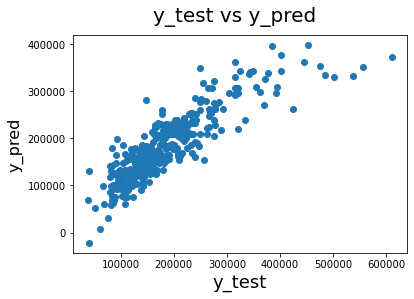

In [140]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [141]:
#final dataframe 
final_df = df[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,284,1262,1262,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7,434,920,920,866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,540,756,961,756,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,490,1145,1145,1053,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


# Final evalution

In [142]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.7683826161128173
0.7574552282274934
1478148907620.088
685364859219.5037
1447746236.6504288
1561195579.0877078


# Ridge Regression

In [143]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [144]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [145]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 34261.93085326   6686.47977282  10470.93300114  14559.60043575
 -16100.38878374 -41448.66367376 -43645.00903066  12507.71543938
  34027.04174117  15106.11778291  88833.49287273  51685.82122067
  17174.42411902  34177.76031676 -29498.27436112  29458.5954326
 -20503.25023638  26210.10969039   9181.55678722  10111.34224908
   8368.73554594  -5376.23129054]


In [146]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7672631471708983
0.7538008876315976
1485293197767.2312
695691021312.1481
1454743582.5340168
1584717588.41036


# Lasso

In [147]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [148]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [149]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=20)

In [150]:
lasso.coef_

array([ 33657.70691615,   6608.07427908,  10501.72634076,  14402.51955918,
       -16757.11438512, -43581.98106062, -46037.62925616,  12553.98554773,
        36257.50242908,  19419.28349998,  95497.90523776,  55566.11953179,
        19477.4155187 ,  41070.65856112, -32431.10046837,  38836.50413784,
       -46243.51020489,  28772.01307977,   8924.43219615,   8883.48256198,
         8361.16556791,  -5357.69605152])

In [151]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7682174832630332
0.7564405386537659
1479202761771.3784
688232093057.4756
1448778415.055219
1567726863.4566643


In [153]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),7.683826e-01,7.672631e-01,7.682175e-01
1,R2 Score (Test),7.574552e-01,7.538009e-01,7.564405e-01
2,RSS (Train),1.478149e+12,1.485293e+12,1.479203e+12
3,RSS (Test),6.853649e+11,6.956910e+11,6.882321e+11
4,MSE (Train),3.804926e+04,3.814110e+04,3.806282e+04
5,MSE (Test),3.951197e+04,3.980851e+04,3.959453e+04


In [154]:
betas = pd.DataFrame(index=X.columns)

In [155]:
betas.rows = X.columns

In [156]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [157]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,33456.527564,34261.930853,33657.706916
BsmtQual,6670.178848,6686.479773,6608.074279
BsmtExposure,10516.989792,10470.933001,10501.726341
KitchenQual,14318.814569,14559.600436,14402.519559
MSSubClass_30,-17267.323289,-16100.388784,-16757.114385
MSSubClass_120,-44596.331474,-41448.663674,-43581.981061
MSSubClass_160,-47159.726371,-43645.009031,-46037.629256
LotShape_IR2,13131.868153,12507.715439,12553.985548
Neighborhood_Crawfor,36842.635665,34027.041741,36257.502429
Neighborhood_NPkVill,23990.610758,15106.117783,19419.283500


Que1: Double the values of Alpha for lasso & Ridge

In [158]:
#earlier for Ridge alpha = 10 now take 20
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 34883.02031166   6713.90542921  10424.81922014  14771.5127987
 -15078.8502416  -39029.39867427 -40855.74203065  11874.18683569
  31525.6774487   10282.58970441  82766.30126819  47639.43697346
  14654.10435542  27665.31850854 -26112.85081323  22317.15948864
 -11403.00848881  23023.6276277    8783.81183805   7700.18669984
   8409.27466444  -5087.80246067]
0.7655725282332019
0.7502897693302325


In [159]:
#earlier for Lasso alpha = 100 now take 200
alpha =40

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 33856.53957378   6546.0354347   10486.42770336  14487.59839297
 -16248.35185409 -42566.60594485 -44915.08224465  11976.5404372
  35672.92123651  14847.74878234  93927.64459027  54411.88935289
  18488.28895893  38450.79331441 -31031.94941914  33846.61175268
 -24722.59621875  27164.81826822   8454.67862665   2164.51870848
   8368.38344983  -4961.63739406]
0.7677221309176926
0.7551545371628557


___As alpha value increased more feautrues removed from model. But r2score is also dropped by 1% in both test and train data___